In [2]:
import pandas as pd
import json


In [3]:
#clean data to seperate control data
control_society_df = pd.read_csv("control_society_recommended.csv")

society_data = control_society_df[control_society_df["persona"] == "Society"]
control_data = control_society_df[control_society_df["persona"] == "control"]

society_data.to_csv("fixed_society_recommended.csv", index=False)
control_data.to_csv("fixed_control_society_recommended.csv", index=False)


In [14]:
# Read each dataset 
beauty_df = pd.read_csv("Beauty_recommended.csv")
sports_df = pd.read_csv("sports_recommended.csv")
society_df = pd.read_csv("fixed_society_recommended.csv")
control_society_df = pd.read_csv("fixed_control_society_recommended.csv")

# Check if the number of rows is the same for all datasets
if len(beauty_df) == len(sports_df) == len(society_df) == len(control_society_df):
    print("Number of rows in all datasets is the same.")
else:
    print("Number of rows in datasets is not the same. Check your data.")

Number of rows in all datasets is the same.


In [17]:
# Function to count non-empty rec_# columns for each row
def count_non_empty(row):
    return max(sum(1 for col in row[1:] if isinstance(col, str) and col.startswith("https://")) , 0)


In [18]:
# Count non-empty rec_# columns for each row in each dataset
beauty_df['beauty_count'] = beauty_df.apply(count_non_empty, axis=1)
sports_df['sports_count'] = sports_df.apply(count_non_empty, axis=1)
society_df['society_count'] = society_df.apply(count_non_empty, axis=1)
control_society_df['control_society_count'] = control_society_df.apply(count_non_empty, axis=1)

# Merge the counts into a new DataFrame
merged_df = beauty_df[['distributed_link', 'beauty_count']].merge(sports_df[['distributed_link', 'sports_count']], on='distributed_link', how='outer')
merged_df = merged_df.merge(society_df[['distributed_link', 'society_count']], on='distributed_link', how='outer')
merged_df = merged_df.merge(control_society_df[['distributed_link', 'control_society_count']], on='distributed_link', how='outer')

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

# Save the new DataFrame to csv
merged_df.to_csv("merged_counts.csv", index=False)

In [31]:
# Merge for pyktok
# Filter the DataFrame to keep only the rows with count of 4 "8"s
filtered_df = merged_df[(merged_df['beauty_count'] == 8) & 
                        (merged_df['sports_count'] == 8) & 
                        (merged_df['society_count'] == 8) & 
                        (merged_df['control_society_count'] == 8)]


In [28]:

datasets = [(beauty_df, 'beauty'), (sports_df, 'sports'), (society_df, 'society'), (control_society_df, 'control_society')]

# Merge all rec_# links from the four datasets
filtered_df['rec_links'] = filtered_df.apply(lambda row: {
    f"{prefix}_rec_{i}": dataset.loc[dataset['distributed_link'] == row['distributed_link'], f"rec_{i}"].values[0]
    for dataset, prefix in datasets for i in range(1, 9)
}, axis=1)

/var/folders/mc/sgypv2yj51sbjjnm2x0y1ryw0000gn/T/ipykernel_26744/1457864378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rec_links'] = filtered_df.apply(lambda row: {


In [29]:
# Save the DataFrame to JSON
json_data = filtered_df.to_json(orient='records')

# Write JSON data to file
with open("filtered_data.json", "w") as json_file:
    json_file.write(json_data)

In [33]:
# Merge for Whisper
merged_rec_df = pd.read_csv("merged_recommended.csv")

filtered_merged_df = pd.merge(merged_rec_df, filtered_df[['distributed_link']], on='distributed_link', how='inner')

filtered_merged_df.to_csv("filtered_merged_recommended.csv", index=False)


Generate boxplot

In [1]:
import matplotlib.pyplot as plt

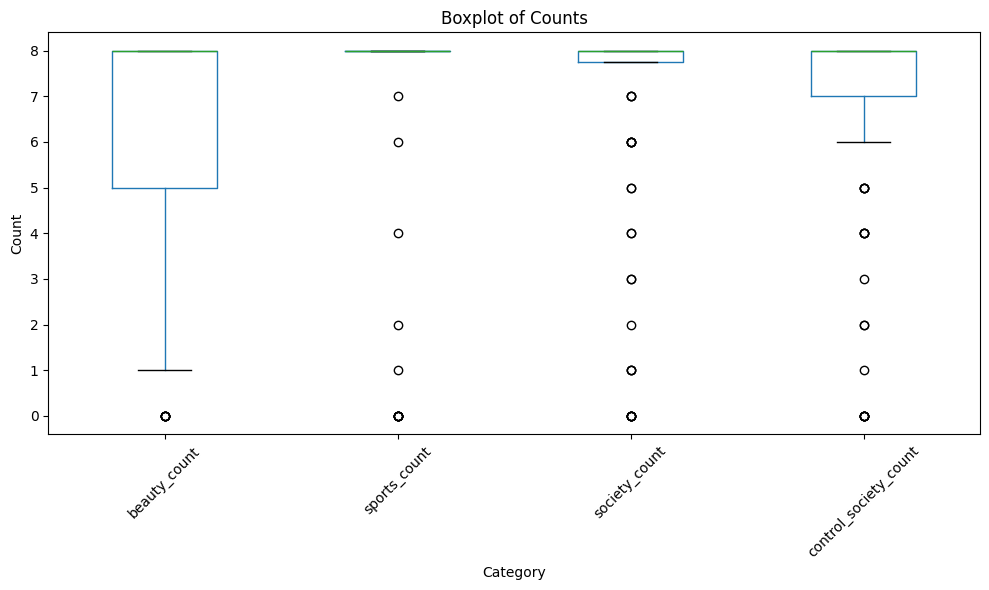

In [5]:
df = pd.read_csv('merged_counts.csv')

# Creating the boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column=['beauty_count', 'sports_count', 'society_count', 'control_society_count'])
plt.title('Boxplot of Counts')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

plt.show()
